In [2]:
import pandas as pd

df = pd.read_csv('customers.csv')

In [3]:
df.head()

,Name,Address
0,Frank Manning,"6461 Quinn Groves, East Matthew, New Hampshire..."
1,Elizabeth Johnson,"1360 Tracey Ports Apt. 419, Kyleport, Vermont,..."
2,Donald Stephens,"19120 Fleming Manors, Prestonstad, Montana, 23495"
3,Michael Vincent III,"441 Olivia Creek, Jimmymouth, Georgia, 82991"
4,Jasmine Zamora,"4246 Chelsey Ford Apt. 310, Karamouth, Utah, 7..."


In [25]:
add = df['Address'].str.split(', ',expand=True)

In [26]:
df['Street'] = add[0]
df['City'] = add[1]
df['State'] = add[2]
df['Zip'] = add[3]

In [29]:
df.drop('Address',axis=1,inplace=True)

In [30]:
df

,Name,Street,City,State,Zip
0,Frank Manning,6461 Quinn Groves,East Matthew,New Hampshire,16656
1,Elizabeth Johnson,1360 Tracey Ports Apt. 419,Kyleport,Vermont,31924
2,Donald Stephens,19120 Fleming Manors,Prestonstad,Montana,23495
3,Michael Vincent III,441 Olivia Creek,Jimmymouth,Georgia,82991
4,Jasmine Zamora,4246 Chelsey Ford Apt. 310,Karamouth,Utah,76252
...,...,...,...,...,...
9956,Dana Browning,762 Andrew Views Apt. 254,North Paul,New Mexico,28889
9957,Amanda Anderson,44188 Day Crest Apt. 901,Lake Marcia,Maine,37378
9958,Eric Davis,73015 Michelle Squares,Watsonville,West Virginia,03933
9959,Taylor Hernandez,129 Keith Greens,Haleyfurt,Oklahoma,98916


In [33]:
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from functools import reduce
import re

In [35]:
with open('friends101.txt','r') as file:
    text = file.read()

monica : 101
rachel : 72
ross : 69
chandler : 57
joey : 55
paul : 44
know : 39
oh : 34
phoebe : 24
okay : 23
like : 23
cut : 22
guy : 19
go : 19
get : 17
scene : 17
got : 17
na : 16
la : 16
right : 15
yeah : 15
look : 15
coffee : 14
well : 14
think : 14
hey : 13
want : 11
god : 11
one : 10
really : 10
sorry : 10
mean : 10
love : 10
thing : 10
date : 9
back : 9
gon : 9
something : 8
everybody : 8
time : 8


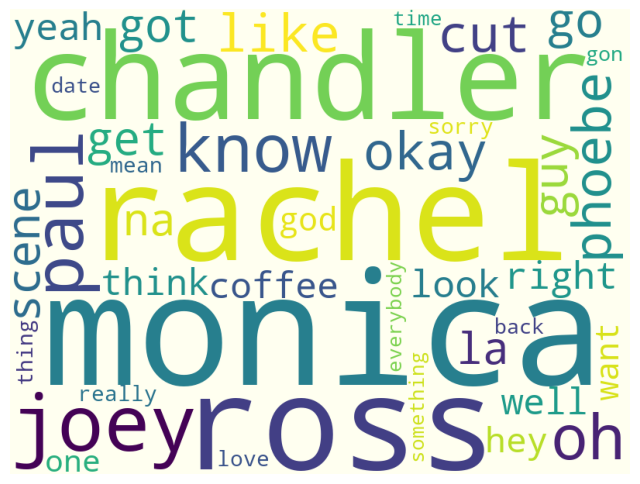

In [36]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

EnWords = re.sub(r"[^a-zA-Z]+", " ", str(text))  # 알파뱃으로 시작하지 않는 단어 공백으로 처리
EnWordsToken = word_tokenize(EnWords.lower())  # 소문자로 변환한 단어 토큰화
EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]  # 단어토큰이 불용어가 아닐 경우 리스트에 추가
words = [lemma.lemmatize(w) for w in EnWordsTokenStop]  # 

count = Counter(words)

word_count = dict()

for tag, counts in count.most_common(40):  # 빈도수가 높은 50개의 단어
    if(len(str(tag))>1):  # 단어의 길이가 1 이상인 것만
        word_count[tag] = counts  # 딕셔너리에 저장
        print("%s : %d" % (tag, counts))

stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()